In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
def taylor_expan(func,xx,num_terms):
        '''
        泰勒展开函数
        func:符号变量函数，自变量为x
        num_terms:展开的次数
        xx:展开的位置
        '''
        x = sym.Symbol('x')
        sums = 0
        for i in range(num_terms+1):
            # 求i次导数
            numerator = func.diff(x,i)
            # 导数在xx点的值（泰勒展开分子）
            numerator = numerator.evalf(subs={x:xx})
            # i的阶乘
            denominator = np.math.factorial(i)
            # 累加项
            sums += numerator/denominator*(x-xx)**i
        return sums

In [3]:
def A_(x,X,m):
    '''
    x:符号变量
    X:插值节点
    m:给定的mi阶导信息
    '''
    x = sym.Symbol('x')
    out = 1
    for i,mi in enumerate(m):
        out *= (x-X[i])**mi
    return out

In [4]:
def hermite(x_i,X,Y):
    '''
    x_i:待插值节点
    X:插值节点
    Y:插值节点值
    '''
    x_i = np.array(x_i)
    X = np.array(X)
    Y = np.array(Y)
    # 插值点数
    k = len(X)
    # 给定的mi阶导信息
    flag = np.isnan(Y)==False
    m = flag.sum(axis=0)
    # 求mi-j-1阶泰勒展开
    x = sym.Symbol('x')
    A = A_(x,X,m)
    hermite_out = 0
    for i in range(k):
        for j in range(m[i]):
            func_1 = A/(x-X[i])**m[i]
            func_2 = (x-X[i])**m[i]/A
            taylor = taylor_expan(func_2,X[i],m[i]-j-1)
            fji = Y[j,i]
            hermite_out += func_1*fji*(x-X[i])**j/np.math.factorial(j)*taylor
    out = sym.lambdify('x', hermite_out, "numpy")
    return out(x_i)

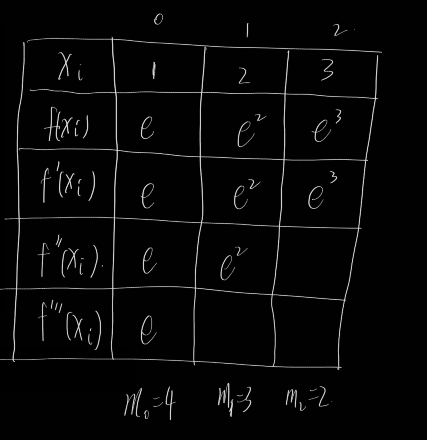

In [5]:
e = np.exp(1)
X = np.array([1,2,3])
Y = np.array([np.exp(X)+np.sin(X),np.exp(X)+np.cos(X),[e-np.sin(1),e**2-np.sin(2),np.nan],[e-np.cos(1),np.nan,np.nan]])

In [6]:
X

array([1, 2, 3])

In [7]:
Y

array([[ 3.55975281,  8.29835353, 20.22665693],
       [ 3.25858413,  6.97290926, 19.09554443],
       [ 1.87681084,  6.47975867,         nan],
       [ 2.17797952,         nan,         nan]])

In [10]:
x = np.linspace(1,7,10)

In [13]:
y = hermite(x,X,Y)

In [15]:
x

array([1.        , 1.66666667, 2.33333333, 3.        , 3.66666667,
       4.33333333, 5.        , 5.66666667, 6.33333333, 7.        ])

In [14]:
y

array([   3.55975281,    6.28989822,   11.0353435 ,   20.22665693,
         38.61797862,   75.21009634,  146.82031493,  284.31310974,
        542.78081779, 1017.23888306])

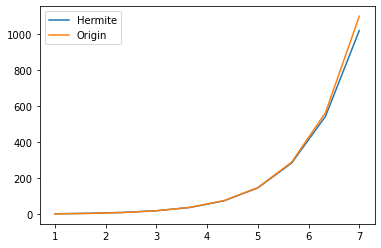

In [12]:
plt.plot(x,y,label='Hermite')
plt.plot(x,np.exp(x),label='Origin')
#plt.scatter(x[7],y[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

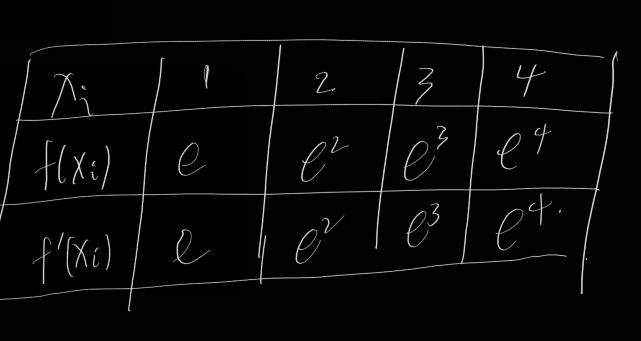

In [106]:
e = np.exp(1)
X = np.array([1,2,3,4])
Y = np.array([[e,e**2,e**3,e**4],[e,e**2,e**3,e**4]])

In [107]:
X

array([1, 2, 3, 4])

In [108]:
Y

array([[ 2.71828183,  7.3890561 , 20.08553692, 54.59815003],
       [ 2.71828183,  7.3890561 , 20.08553692, 54.59815003]])

In [109]:
x = np.linspace(1,4,10)
y = hermite(x,X,Y)

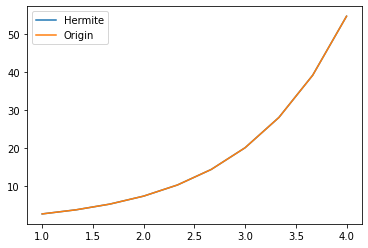

In [110]:
plt.plot(x,y,label='Hermite')
plt.plot(x,np.exp(x),label='Origin')
#plt.scatter(x[7],y[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

In [111]:
e = np.exp(1)
X = np.array([1,2,3])
Y = np.array([[e,e**2,e**3],[e,e**2,e**3]])

taylor: 0.75*x - 0.5
origin: 1/((x - 3)**2*(x - 2)**2)
loc: 1
cishu: 1
---------
taylor: 0.250000000000000
origin: 1/((x - 3)**2*(x - 2)**2)
loc: 1
cishu: 0
---------
taylor: 0.e-125*x + 1.0
origin: 1/((x - 3)**2*(x - 1)**2)
loc: 2
cishu: 1
---------
taylor: 1.00000000000000
origin: 1/((x - 3)**2*(x - 1)**2)
loc: 2
cishu: 0
---------
taylor: 2.5 - 0.75*x
origin: 1/((x - 2)**2*(x - 1)**2)
loc: 3
cishu: 1
---------
taylor: 0.250000000000000
origin: 1/((x - 2)**2*(x - 1)**2)
loc: 3
cishu: 0
---------


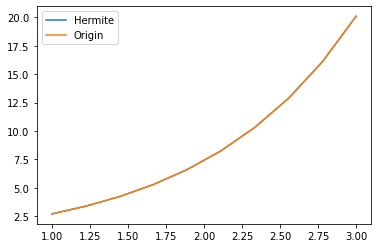

In [112]:
x = np.linspace(1,3,10)
y = hermite(x,X,Y)
plt.plot(x,y,label='Hermite')
plt.plot(x,np.exp(x),label='Origin')
#plt.scatter(x[7],y[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

taylor: 2.0*x - 1.0
origin: (x - 2)**(-2)
loc: 1
cishu: 1
---------
taylor: 1.00000000000000
origin: (x - 2)**(-2)
loc: 1
cishu: 0
---------
taylor: 5.0 - 2.0*x
origin: (x - 1)**(-2)
loc: 2
cishu: 1
---------
taylor: 1.00000000000000
origin: (x - 1)**(-2)
loc: 2
cishu: 0
---------


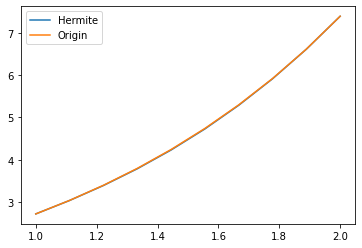

In [113]:
e = np.exp(1)
X = np.array([1,2])
Y = np.array([[e,e**2],[e,e**2]])
x = np.linspace(1,2,10)
y = hermite(x,X,Y)
plt.plot(x,y,label='Hermite')
plt.plot(x,np.exp(x),label='Origin')
#plt.scatter(x[7],y[7],s=30.,c='r')
plt.legend(loc='best')
plt.show()

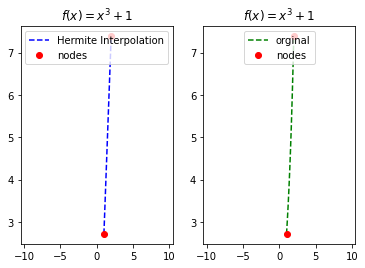

In [49]:
from scipy.interpolate import KroghInterpolator
import numpy as np
import numpy as np, matplotlib.pyplot as plt

x = np.linspace(1, 2, 10)
nodes = np.array([1,2])
def f(x):
    return np.exp(x)
xi = np.array([1,2])
yi = np.array([f(1),f(2)])
interpolant = KroghInterpolator(xi, yi)
plt.figure()

plt.subplot(121)
plt.plot(x, interpolant(x), 'b--',label='Hermite Interpolation')
plt.plot(nodes, f(nodes), 'ro', label='nodes')
plt.legend(loc=9)
plt.xlim(-10.5, 10.5)
plt.title('$f(x) = x^3 + 1$')

plt.subplot(122)
plt.plot(x, f(x), 'g--', label='orginal')
plt.plot(xi, f(xi), 'ro', label='nodes')
plt.legend(loc=9)
plt.title('$f(x) = x^3 + 1$')
plt.xlim(-10.5, 10.5)
plt.show()